In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss
import itertools
from sklearn.preprocessing import LabelEncoder
plt.style.use('ggplot')

In [2]:
dict_dayweek = {0: "Segunda",
                1: "Terça",
                2: "Quarta",
                3: "Quinta",
                4: "Sexta",
                5: "Sabado",
                6: "Domingo"}

In [3]:
df = pd.read_csv("data/acorrencia_aeronave_final.csv")
df.replace({"dia_semana": dict_dayweek},inplace=True)
df

,codigo_aeronave,codigo_operador,equipamento,fabricante,modelo,tipo_motor,quantidade_motores,peso_maximo_decolagem,quantidade_assentos,ano_fabricacao,...,quantidade_recomendacoes,aeronaves_envolvidas,dia,mes,ano,periodo_mes,dia_semana,periodo_semana,hora,periodo_dia
0,4,241,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,56-C,PISTÃO,1.0,660,2.0,1962.0,...,0,1,14,6,2011,meio,Terça,semana,20,noite
1,40,160,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,56-C,PISTÃO,1.0,660,2.0,1960.0,...,0,1,5,11,2015,inicio,Quinta,semana,19,noite
2,118,1232,AVIÃO,BEECH AIRCRAFT,95-B55,PISTÃO,2.0,2310,6.0,1966.0,...,4,1,15,12,2010,meio,Quarta,semana,9,manha
3,130,3992,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-721C,PISTÃO,1.0,1633,6.0,1979.0,...,1,1,4,2,2009,inicio,Quarta,semana,15,tarde
4,191,4365,AVIÃO,BOEING COMPANY,737-241,JATO,2.0,52389,117.0,1975.0,...,0,1,7,6,2008,inicio,Sabado,fds,14,tarde
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1812,34233,3992,AVIÃO,BEECH AIRCRAFT,G58,PISTÃO,2.0,2495,0.0,0.0,...,0,1,23,6,2014,fim,Segunda,semana,13,tarde
1813,34237,3992,AVIÃO,CESSNA AIRCRAFT,188B,PISTÃO,1.0,1497,1.0,0.0,...,0,1,26,2,2014,fim,Quarta,semana,11,manha
1814,34238,3992,AVIÃO,PIPER AIRCRAFT,PA34-200,PISTÃO,2.0,1810,0.0,0.0,...,0,1,19,8,2014,meio,Terça,semana,17,tarde
1815,34631,3992,AVIÃO,CESSNA AIRCRAFT,TU206G,PISTÃO,1.0,1633,0.0,0.0,...,0,1,13,12,2013,meio,Sexta,semana,3,madrugada


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1817 entries, 0 to 1816
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   codigo_aeronave           1817 non-null   int64  
 1   codigo_operador           1817 non-null   int64  
 2   equipamento               1817 non-null   object 
 3   fabricante                1817 non-null   object 
 4   modelo                    1817 non-null   object 
 5   tipo_motor                1817 non-null   object 
 6   quantidade_motores        1817 non-null   float64
 7   peso_maximo_decolagem     1817 non-null   int64  
 8   quantidade_assentos       1817 non-null   float64
 9   ano_fabricacao            1817 non-null   float64
 10  pais_registro             1817 non-null   object 
 11  categoria_aviacao         1817 non-null   object 
 12  fase_operacao             1817 non-null   object 
 13  tipo_operacao             1817 non-null   object 
 14  nivel_da

### Categorical features

In [5]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [6]:
categorical_feature = ['codigo_aeronave', 'codigo_operador', 'equipamento', 'fabricante',
       'modelo', 'tipo_motor', 'quantidade_motores',
       'quantidade_assentos', 'ano_fabricacao', 'pais_registro',
       'categoria_aviacao', 'fase_operacao', 'tipo_operacao', 'nivel_dano',
       'classificacao', 'tipo', 'localidade', 'uf',
       'pais', 'hora', 'dia', 'mes', 'ano', 'periodo_mes', 'dia_semana',
       'periodo_semana', 'periodo_dia']

Text(0.5, 1.0, 'Cramer V Correlation between Variables')

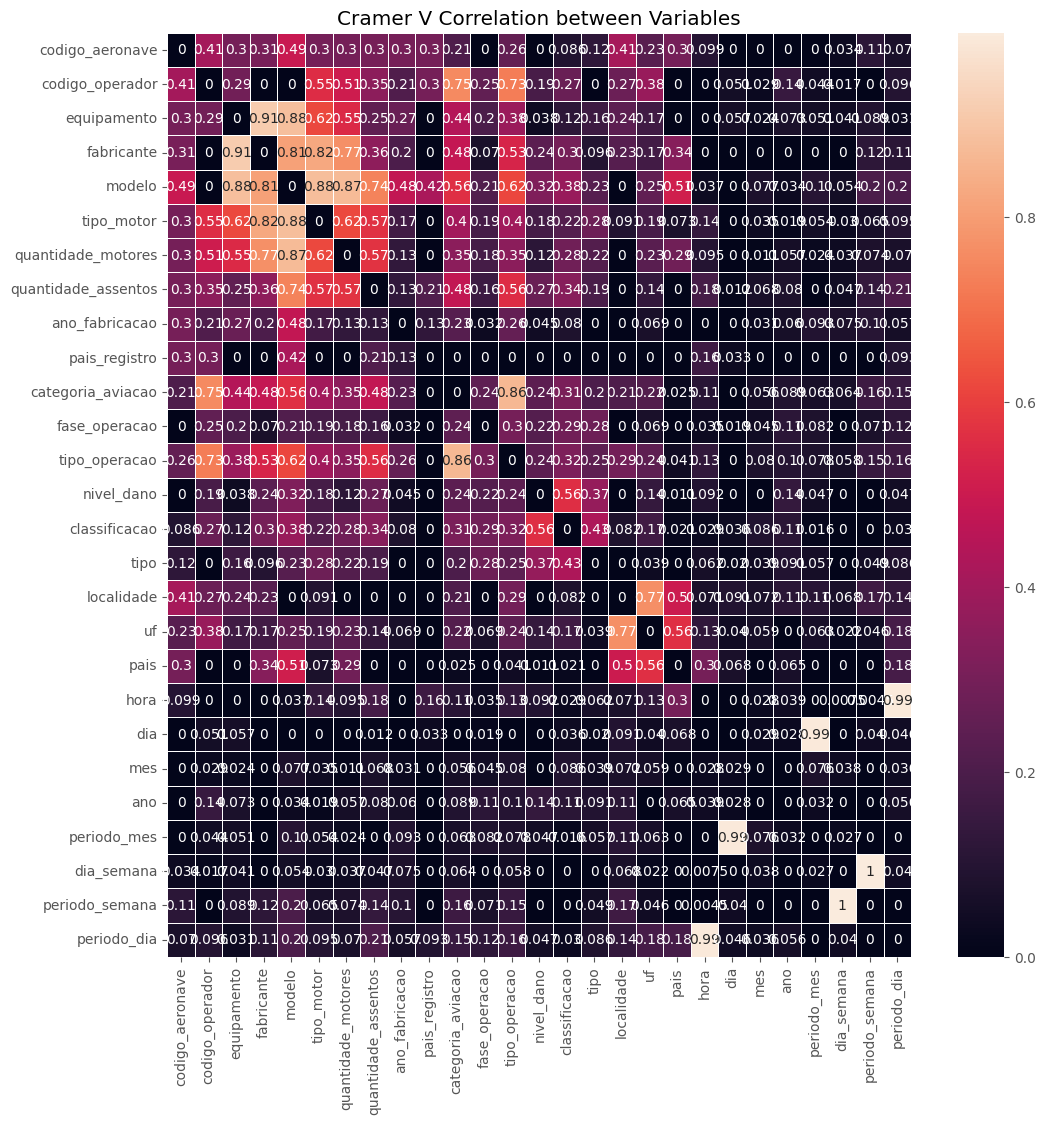

In [7]:
corrM = np.zeros((len(categorical_feature),len(categorical_feature)))

for col1, col2 in itertools.combinations(categorical_feature, 2):
    idx1, idx2 = categorical_feature.index(col1), categorical_feature.index(col2)
    corrM[idx1, idx2] = cramers_v(df[col1], df[col2])
    corrM[idx2, idx1] = corrM[idx1, idx2]

corr = pd.DataFrame(corrM, index=categorical_feature, columns=categorical_feature)
fig, ax = plt.subplots(figsize=(12, 12))
ax = sns.heatmap(corr, annot = True, linewidths=.5, ax=ax); ax.set_title("Cramer V Correlation between Variables")

Text(0.5, 1.0, 'Código aeronave')

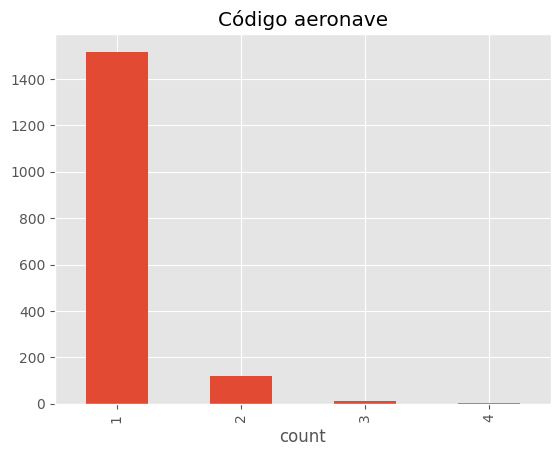

In [24]:
df['codigo_aeronave'].value_counts().value_counts().plot(kind='bar').set_title("Código aeronave")

Text(0.5, 1.0, 'Código operador')

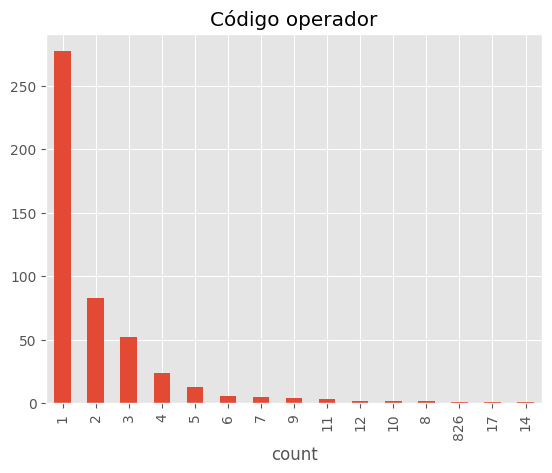

In [23]:
df['codigo_operador'].value_counts().value_counts().plot(kind='bar').set_title("Código operador")

/home/tgopedrosa/projetos/ocorrencia-aviacao/venv/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:509: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


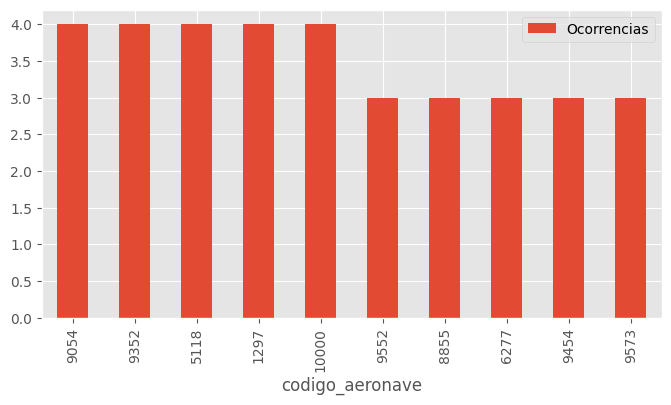

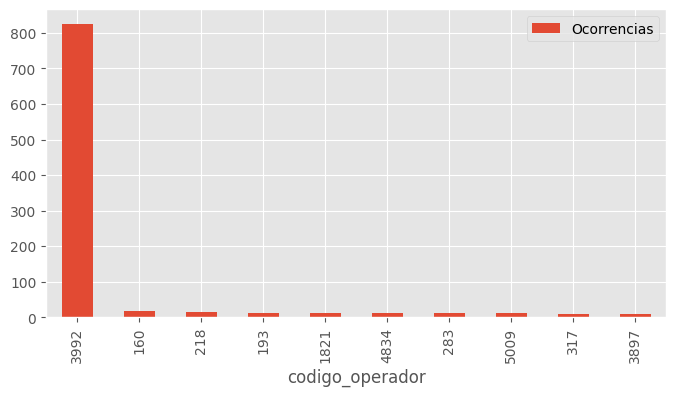

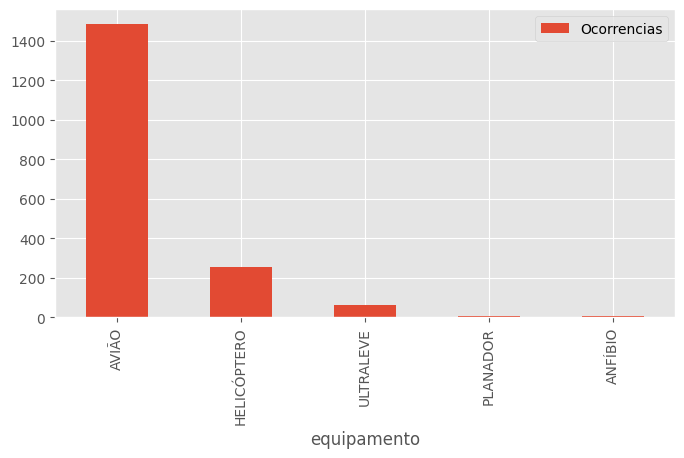

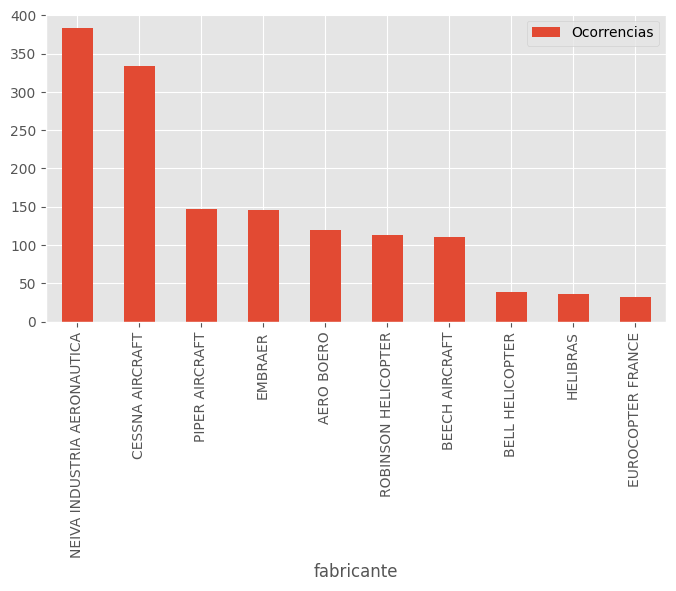

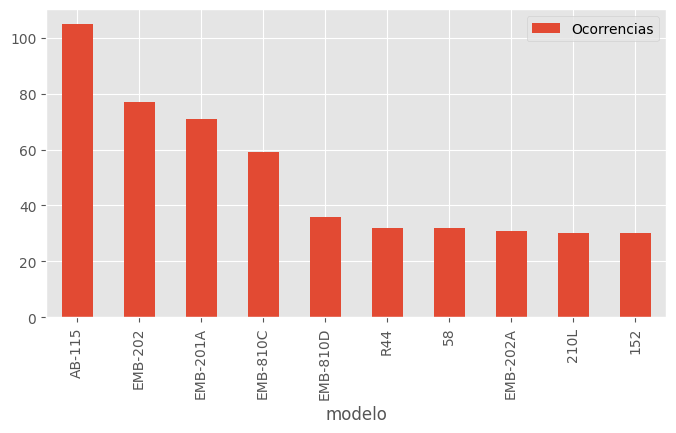

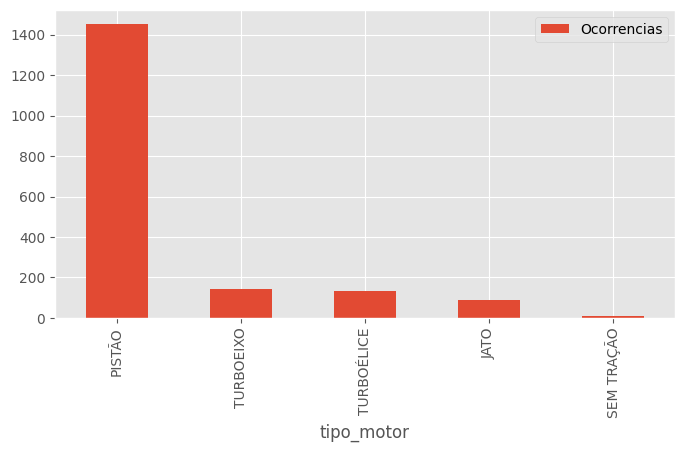

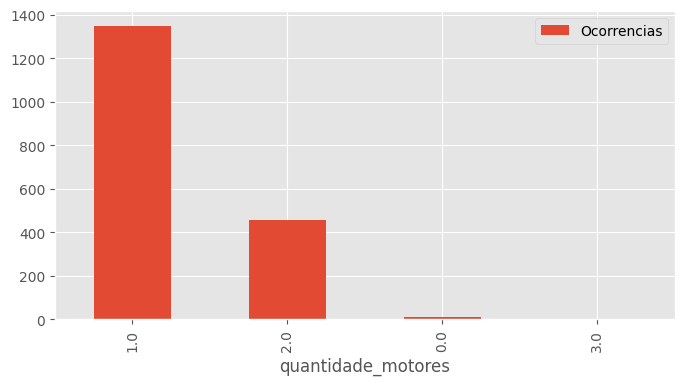

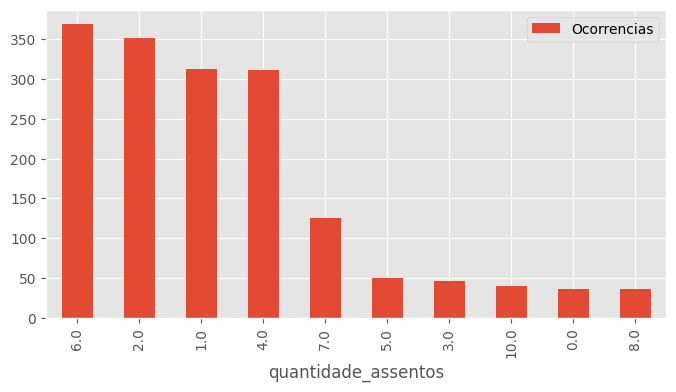

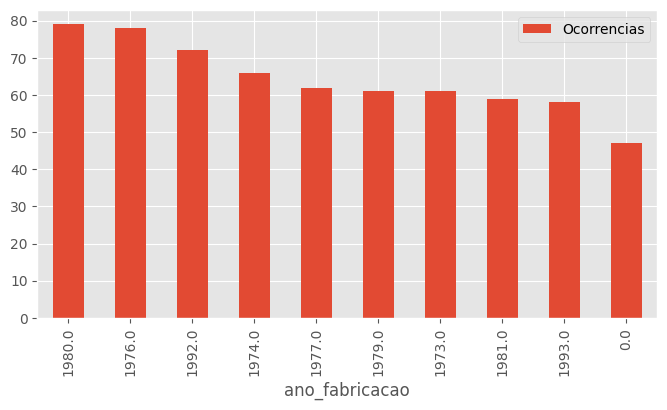

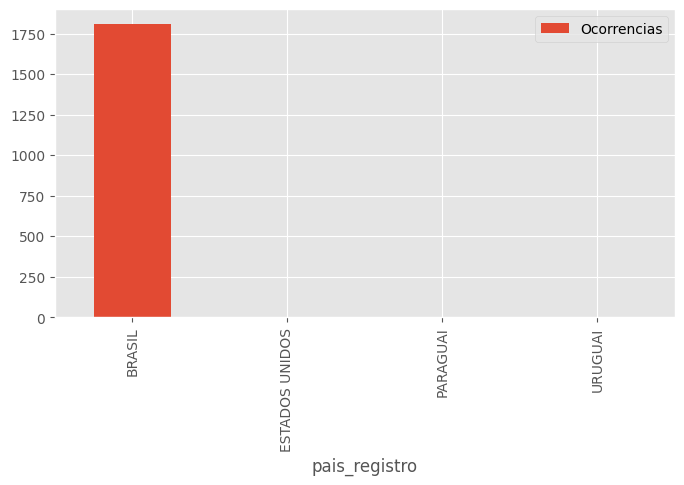

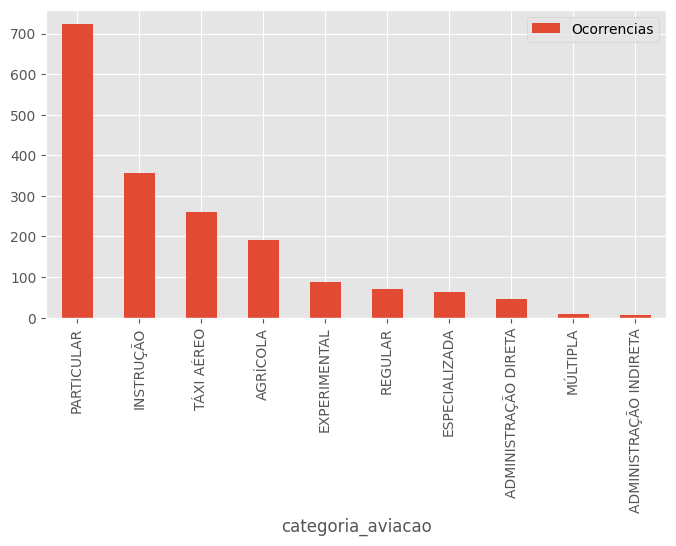

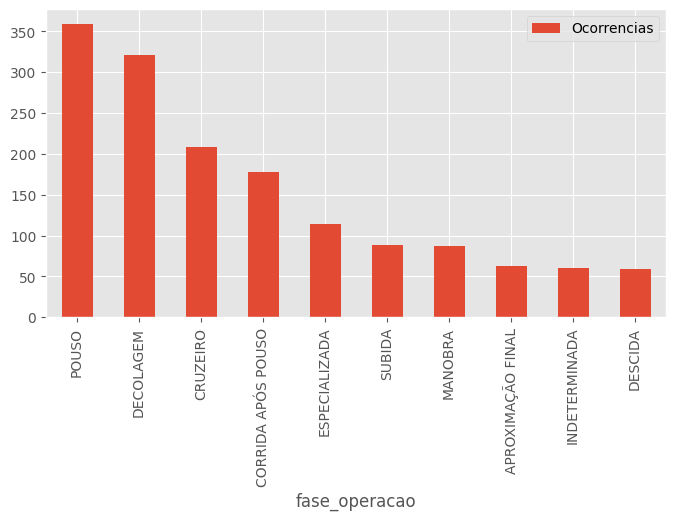

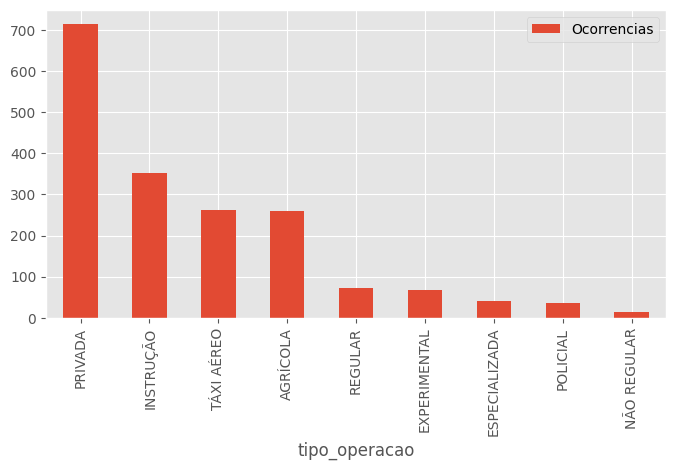

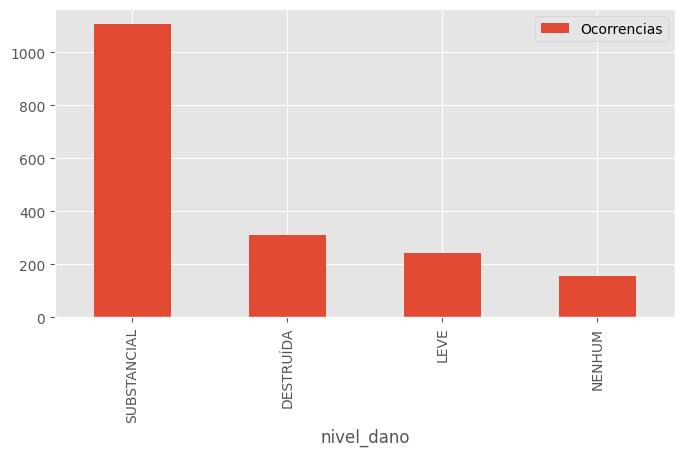

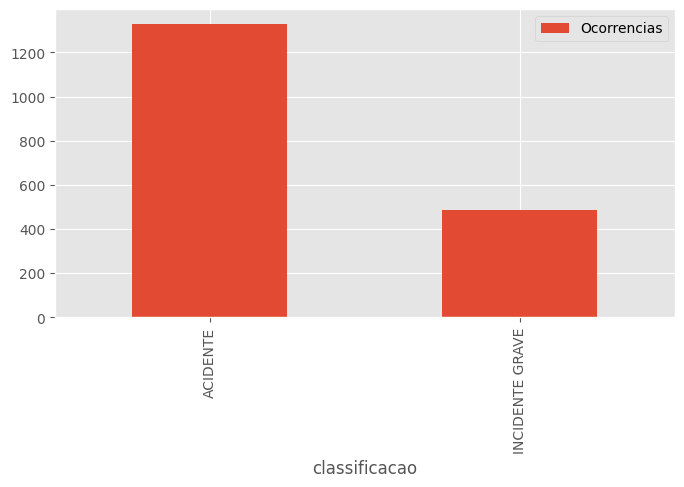

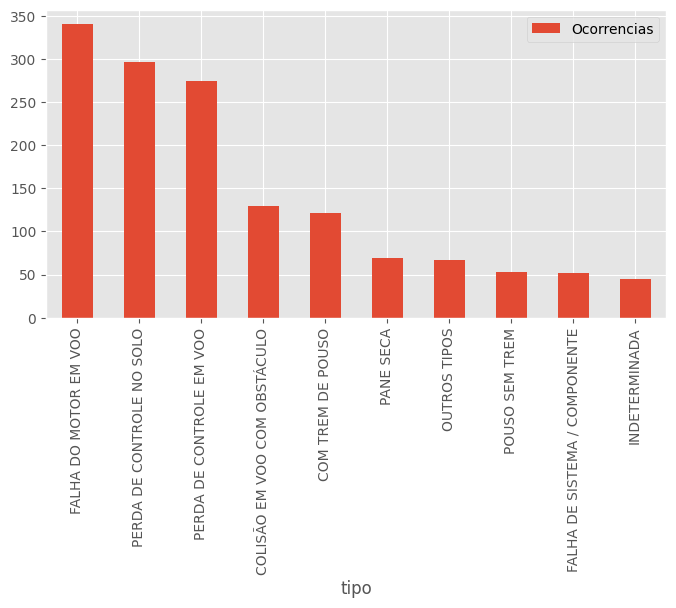

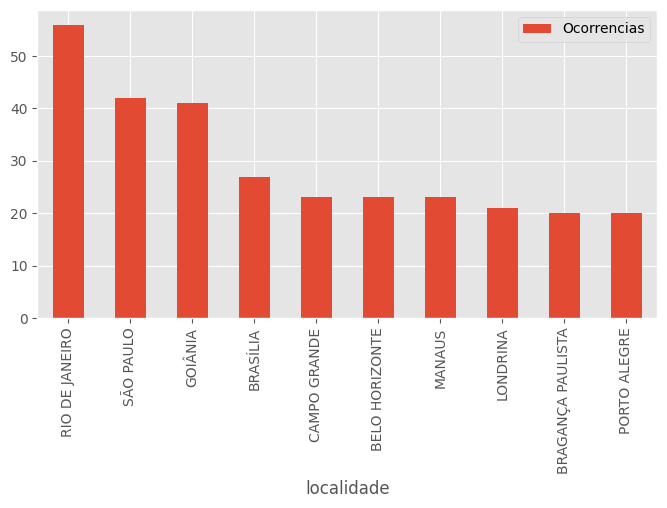

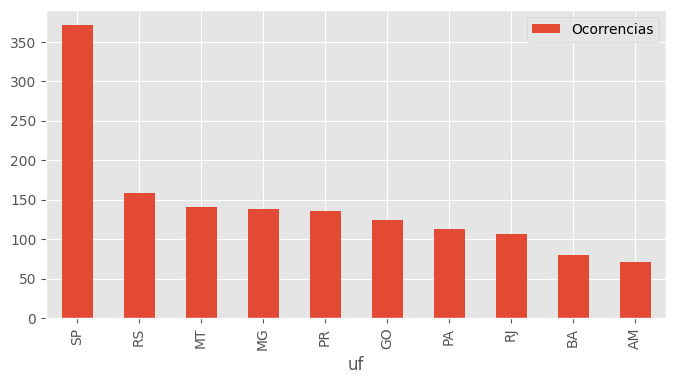

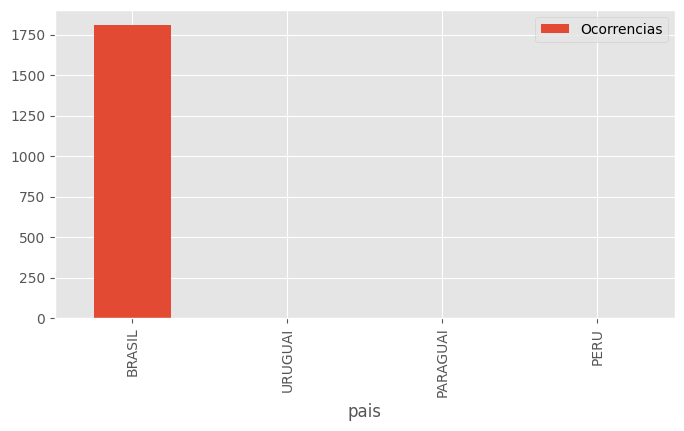

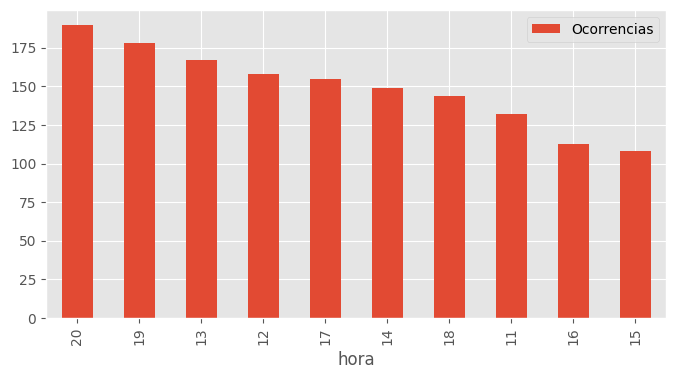

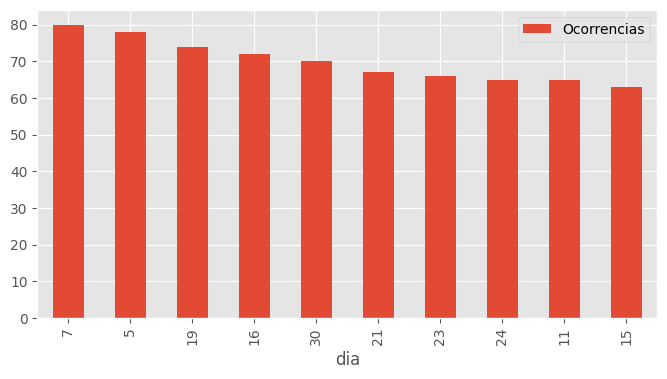

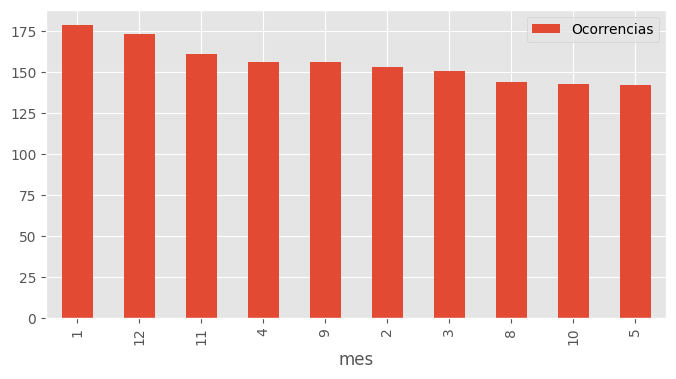

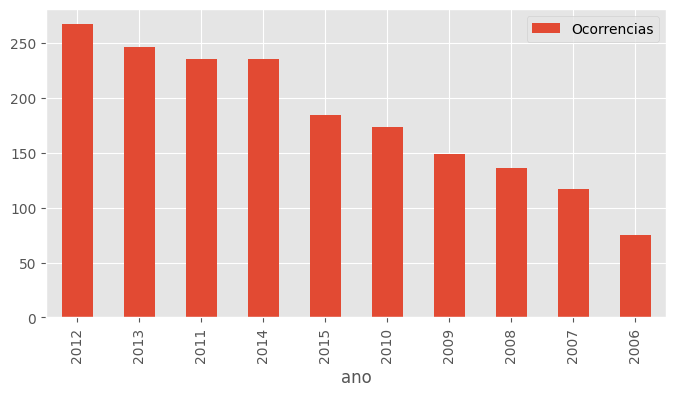

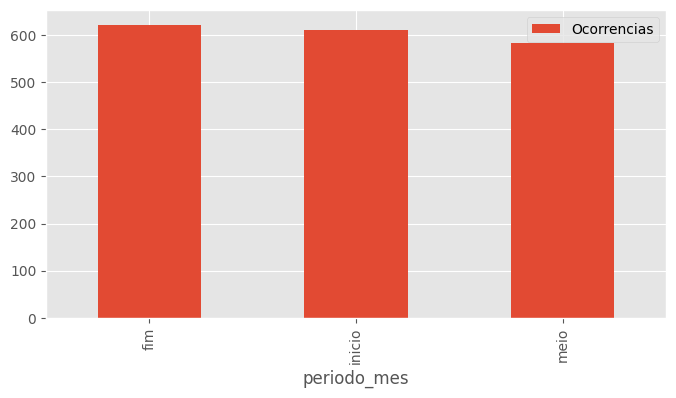

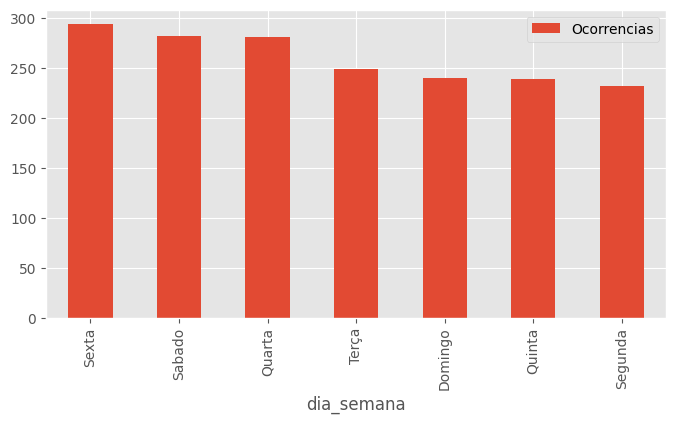

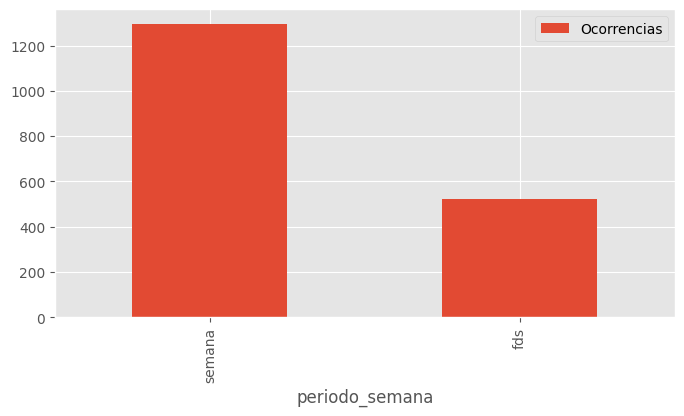

In [8]:
for col in categorical_feature:
    df[col].value_counts().rename('Ocorrencias').to_frame().iloc[0:10,].plot(kind='bar',figsize=(8, 4))
    
plt.close()

#### Correlação das variaveis categoricas com a gravidade do acidente

In [9]:
for cat in categorical_feature:

    print("Correlation between " + cat + " and classificacao: " + str(cramers_v(df[cat], df["classificacao"])))

Correlation between codigo_aeronave and classificacao: 0.08610065272427371
Correlation between codigo_operador and classificacao: 0.2697741902725275
Correlation between equipamento and classificacao: 0.11737954974236428
Correlation between fabricante and classificacao: 0.3016378520984159
Correlation between modelo and classificacao: 0.3791069007413679
Correlation between tipo_motor and classificacao: 0.22036247207545756
Correlation between quantidade_motores and classificacao: 0.2847733238791863
Correlation between quantidade_assentos and classificacao: 0.3429886845051093
Correlation between ano_fabricacao and classificacao: 0.08005954689843088
Correlation between pais_registro and classificacao: 0.0
Correlation between categoria_aviacao and classificacao: 0.3107413241805267
Correlation between fase_operacao and classificacao: 0.2908684931035325
Correlation between tipo_operacao and classificacao: 0.316578587678655
Correlation between nivel_dano and classificacao: 0.559599911457037
Cor

### Numerical features

In [10]:
numerical_features = ['peso_maximo_decolagem', 'quantidade_assentos', 'quantidade_fatalidades', 'quantidade_recomendacoes', 'aeronaves_envolvidas']

<Axes: title={'center': 'Pearson correlation between Variables'}>

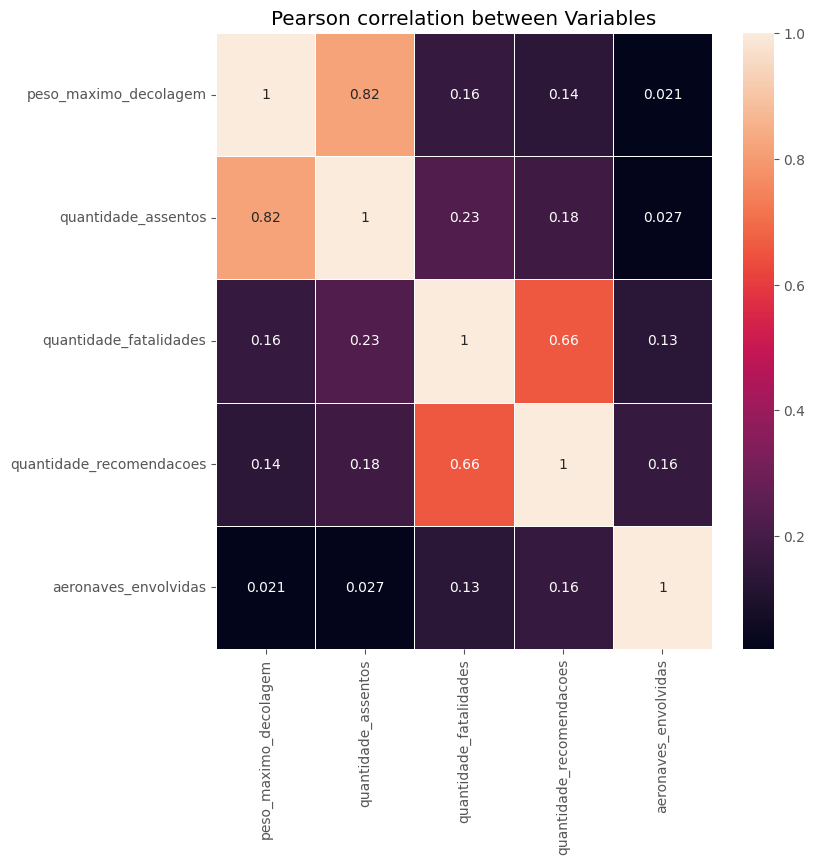

In [11]:
fig, ax = plt.subplots(figsize=(8,8))
ax.set_title("Pearson correlation between Variables")
sns.heatmap(df[numerical_features].corr(), annot = True, linewidths=.5, ax=ax)

In [12]:
df[numerical_features].describe()

,peso_maximo_decolagem,quantidade_assentos,quantidade_fatalidades,quantidade_recomendacoes,aeronaves_envolvidas
count,1817.000000,1817.000000,1817.000000,1817.000000,1817.000000
mean,3928.682444,8.515135,0.573473,1.264172,1.011007
std,14198.690503,24.886525,6.032239,3.998981,0.104365
min,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1088.000000,2.000000,0.000000,0.000000,1.000000
50%,1633.000000,4.000000,0.000000,0.000000,1.000000
75%,2155.000000,6.000000,0.000000,1.000000,1.000000
max,280320.000000,301.000000,199.000000,83.000000,2.000000


In [13]:
df[numerical_features]

,peso_maximo_decolagem,quantidade_assentos,quantidade_fatalidades,quantidade_recomendacoes,aeronaves_envolvidas
0,660,2.0,0,0,1
1,660,2.0,0,0,1
2,2310,6.0,0,4,1
3,1633,6.0,0,1,1
4,52389,117.0,0,0,1
...,...,...,...,...,...
1812,2495,0.0,0,0,1
1813,1497,1.0,0,0,1
1814,1810,0.0,0,0,1
1815,1633,0.0,0,0,1


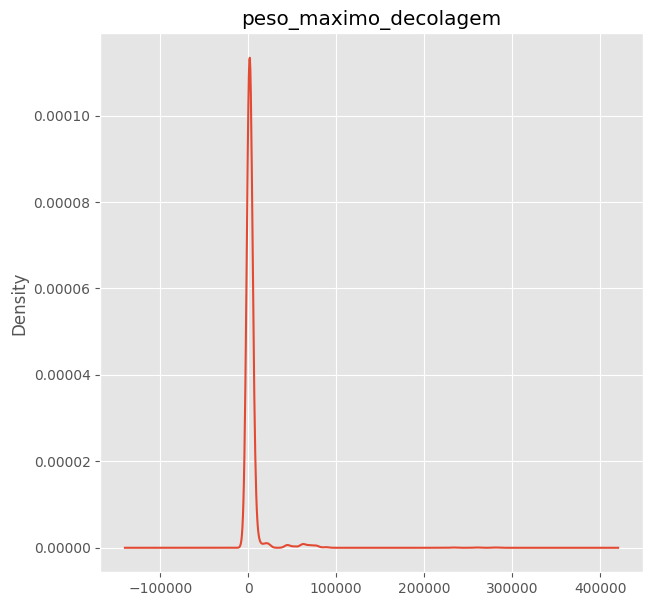

Assimetria: 11.51457041511352


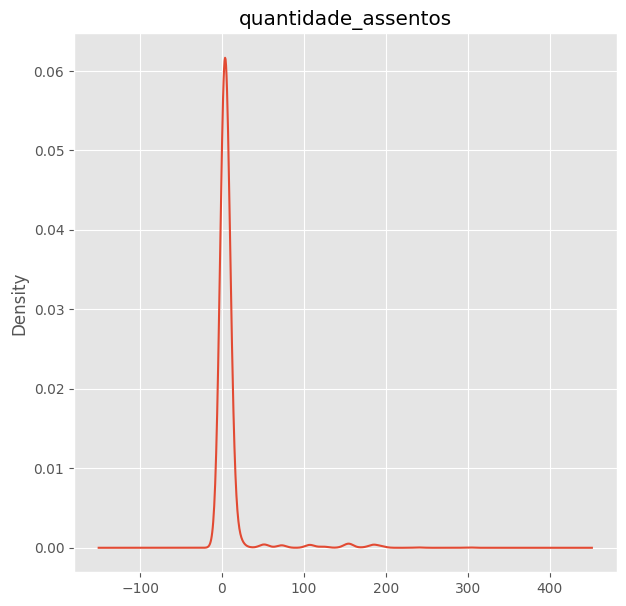

Assimetria: 6.344412484147068


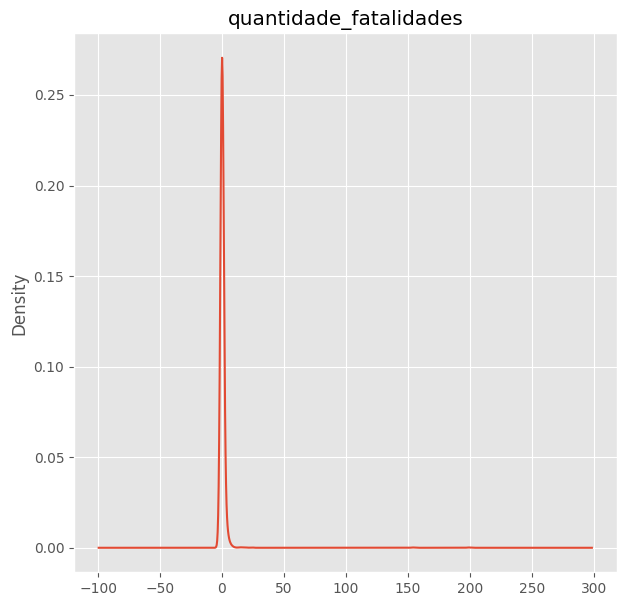

Assimetria: 28.769703211114226


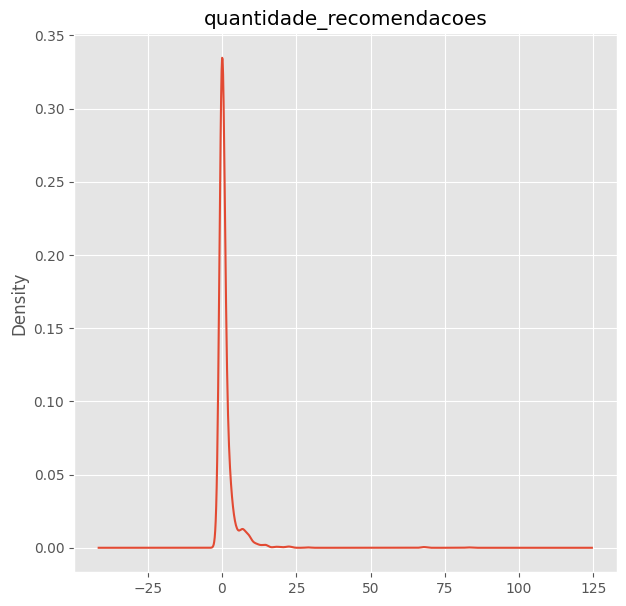

Assimetria: 11.066581109218731


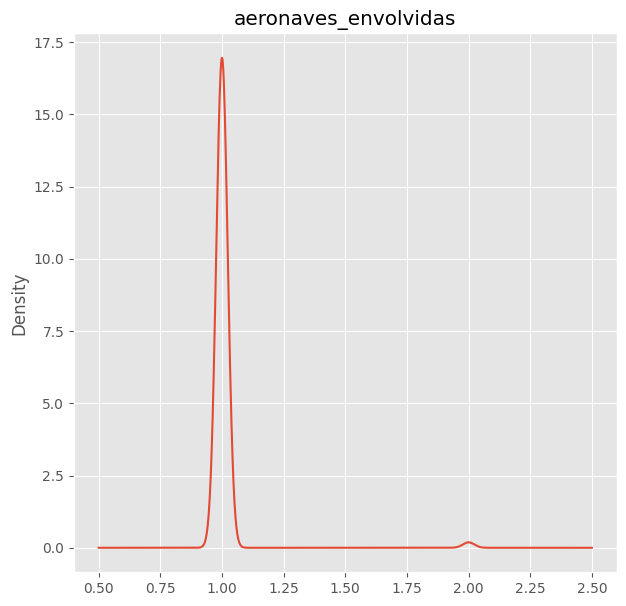

Assimetria: 9.381173061550871


In [14]:
for col in numerical_features:
    fig, ax = plt.subplots(figsize=(7, 7))
    ax.set_title(col)
    df[col].plot(kind='kde')
    plt.show()
    print("Assimetria: " + str(df[col].skew()))

In [15]:
df[numerical_features].describe()

,peso_maximo_decolagem,quantidade_assentos,quantidade_fatalidades,quantidade_recomendacoes,aeronaves_envolvidas
count,1817.000000,1817.000000,1817.000000,1817.000000,1817.000000
mean,3928.682444,8.515135,0.573473,1.264172,1.011007
std,14198.690503,24.886525,6.032239,3.998981,0.104365
min,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1088.000000,2.000000,0.000000,0.000000,1.000000
50%,1633.000000,4.000000,0.000000,0.000000,1.000000
75%,2155.000000,6.000000,0.000000,1.000000,1.000000
max,280320.000000,301.000000,199.000000,83.000000,2.000000


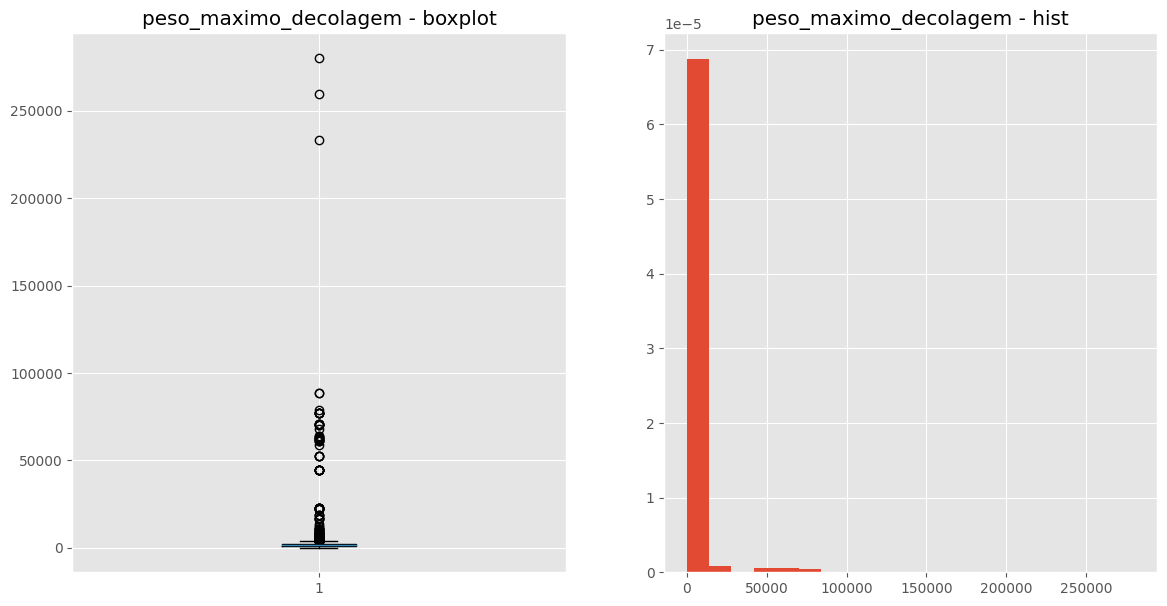

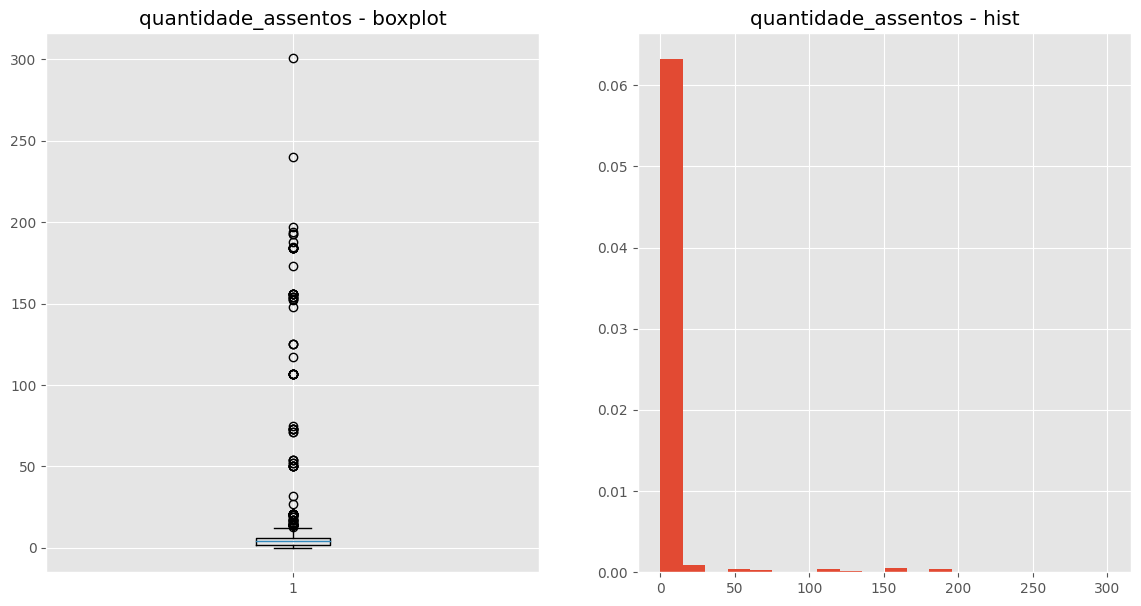

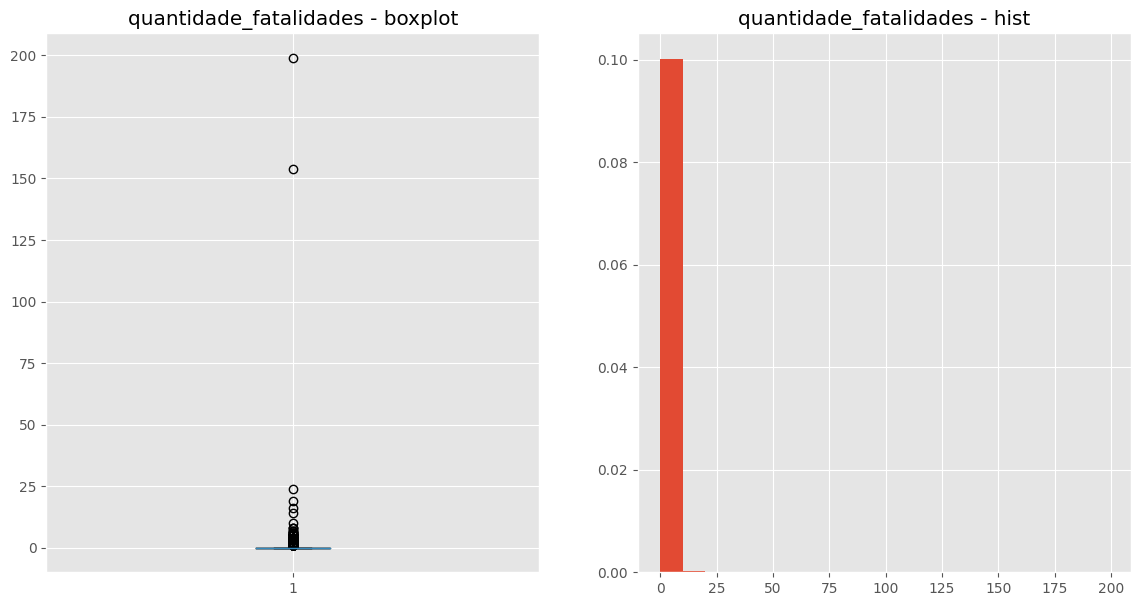

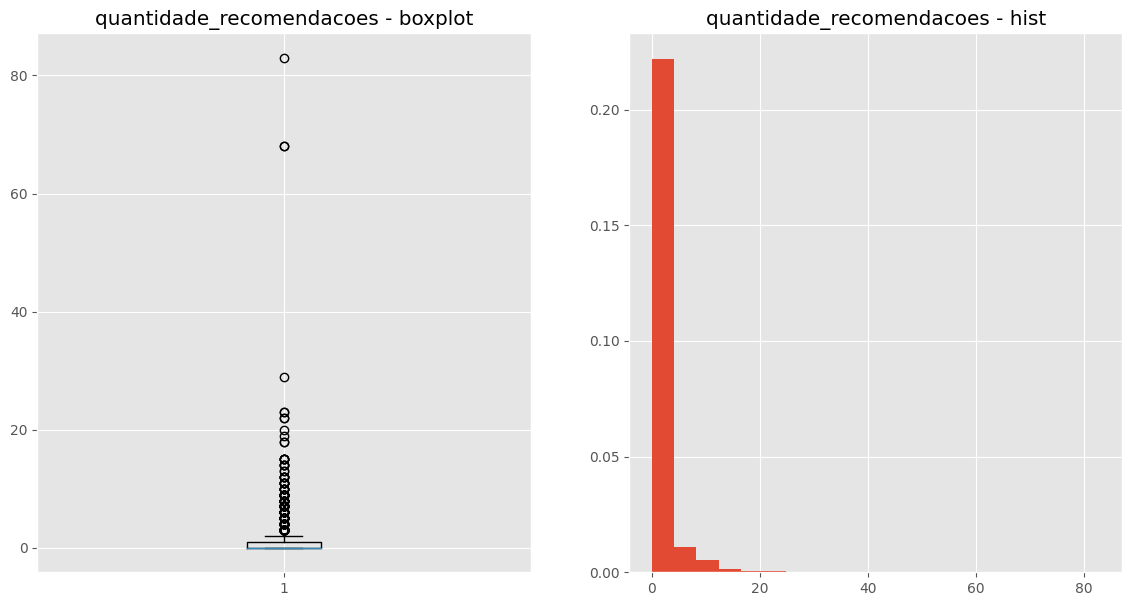

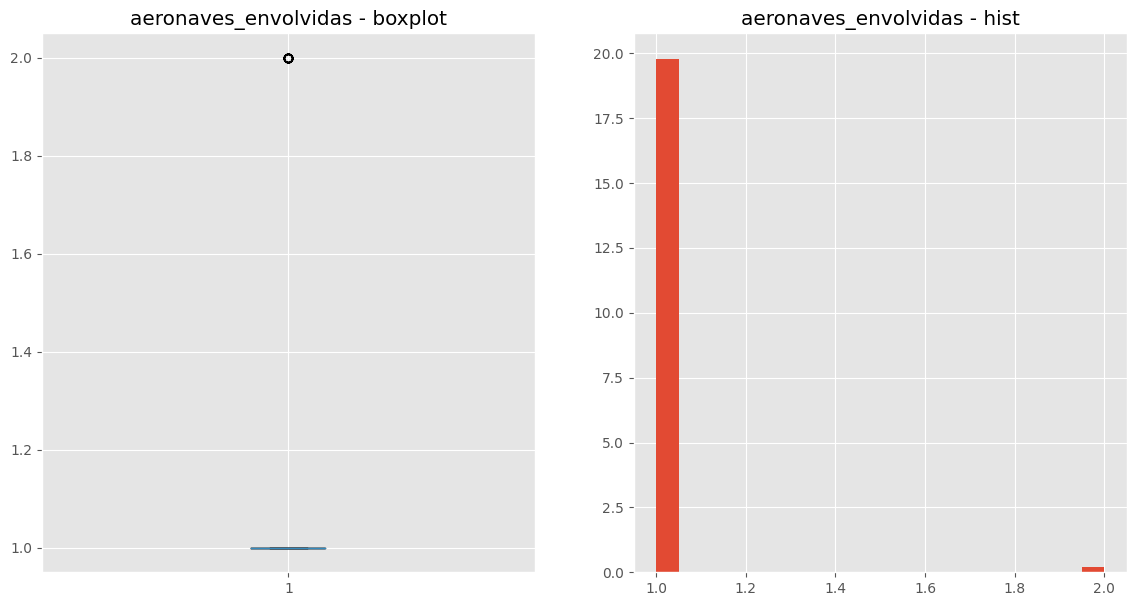

In [16]:
for col in numerical_features:
    fig, ax = plt.subplots(1,2,figsize=(14, 7))
    ax[0].set_title(col + ' - boxplot')
    ax[0].boxplot(df[col].values)
    ax[1].set_title(col + ' - hist')
    ax[1].hist(df[col].values, density=True, bins=20)
    plt.show()